# Supervised Learning - Decision Tree and Random Forest Tree

### Build a decision tree & random forest model with Recruitment data of a company.  Help HR team to predict if the salary and work experience data are genuine. 

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier as DT
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import RandomForestClassifier
import sklearn.metrics as skmet

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# import the dataset
HR_data = pd.read_csv(r"D:\360digi\DS\Sharath\Decision_Tree_2_Master_Class\handson\Datasets_DT\HR_DT.csv")
HR_data.head()

,Position of the employee,no of Years of Experience of employee,monthly income of employee
0,Business Analyst,1.1,39343
1,Junior Consultant,1.3,46205
2,Senior Consultant,1.5,37731
3,Manager,2.0,43525
4,Country Manager,2.2,39891


In [4]:
HR_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196 entries, 0 to 195
Data columns (total 3 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Position of the employee               196 non-null    object 
 1   no of Years of Experience of employee  196 non-null    float64
 2    monthly income of employee            196 non-null    int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 4.7+ KB


In [5]:
HR_data.shape

(196, 3)

In [6]:
# Checking Null Values
HR_data.isnull().sum() # no missing data

Position of the employee                 0
no of Years of Experience of employee    0
 monthly income of employee              0
dtype: int64

In [7]:
HR_data.columns

Index(['Position of the employee', 'no of Years of Experience of employee',
       ' monthly income of employee'],
      dtype='object')

In [8]:
HR_data.describe()

,no of Years of Experience of employee,monthly income of employee
count,196.000000,196.000000
mean,5.112245,74194.923469
std,2.783993,26731.578387
min,1.000000,37731.000000
25%,3.000000,56430.000000
50%,4.100000,63831.500000
75%,7.100000,98273.000000
max,10.500000,122391.000000


## Data Preprocessing

In [9]:
HR_data[' monthly income of employee'].unique() # 30 unique values

array([ 39343,  46205,  37731,  43525,  39891,  56642,  60150,  54445,
        64445,  57189,  63218,  55794,  56957,  57081,  61111,  67938,
        66029,  83088,  81363,  93940,  91738,  98273, 101302, 113812,
       109431, 105582, 116969, 112635, 122391, 121872], dtype=int64)

In [10]:
np.sort([ 39343,  46205,  37731,  43525,  39891,  56642,  60150,  54445,
        64445,  57189,  63218,  55794,  56957,  57081,  61111,  67938,
        66029,  83088,  81363,  93940,  91738,  98273, 101302, 113812,
       109431, 105582, 116969, 112635, 122391, 121872])

array([ 37731,  39343,  39891,  43525,  46205,  54445,  55794,  56642,
        56957,  57081,  57189,  60150,  61111,  63218,  64445,  66029,
        67938,  81363,  83088,  91738,  93940,  98273, 101302, 105582,
       109431, 112635, 113812, 116969, 121872, 122391])

In [11]:
# Grouping the monthly income column data into two bins
HR_data['Y'] = pd.cut(x = HR_data[' monthly income of employee'], bins= [30000, 70000 ,130000], labels = ['Low_Income', 'High_Income'], right = False)
HR_data['Y']

0      Low_Income
1      Low_Income
2      Low_Income
3      Low_Income
4      Low_Income
          ...    
191    Low_Income
192    Low_Income
193    Low_Income
194    Low_Income
195    Low_Income
Name: Y, Length: 196, dtype: category
Categories (2, object): ['Low_Income' < 'High_Income']

(array([28., 14., 49., 27.,  0., 12., 12., 12., 24., 18.]),
 array([ 37731.,  46197.,  54663.,  63129.,  71595.,  80061.,  88527.,
         96993., 105459., 113925., 122391.]),
 <BarContainer object of 10 artists>)

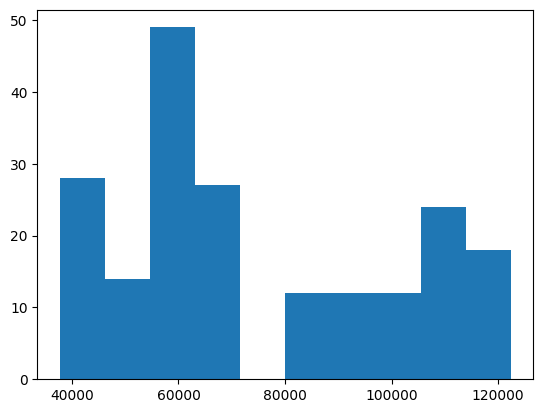

In [12]:
plt.hist(HR_data[' monthly income of employee'])

In [13]:
HR_data[' monthly income of employee'].value_counts()

39343     7
57189     7
46205     7
61111     7
57081     7
56957     7
55794     7
63218     7
67938     7
64445     7
60150     7
56642     7
39891     7
43525     7
37731     7
54445     7
113812    6
122391    6
112635    6
116969    6
105582    6
109431    6
93940     6
101302    6
98273     6
91738     6
81363     6
83088     6
66029     6
121872    6
Name:  monthly income of employee, dtype: int64

In [14]:
HR_data['Y'].value_counts()

Low_Income     118
High_Income     78
Name: Y, dtype: int64

In [15]:
# Data split into Input and Output
X = HR_data.iloc[:,:2]
X

,Position of the employee,no of Years of Experience of employee
0,Business Analyst,1.1
1,Junior Consultant,1.3
2,Senior Consultant,1.5
3,Manager,2.0
4,Country Manager,2.2
...,...,...
191,Region Manager,3.9
192,Partner,4.0
193,Senior Partner,4.0
194,C-level,4.1


In [16]:
# Y = HR_data[' monthly income of employee']
# or
Y = HR_data['Y']
Y

0      Low_Income
1      Low_Income
2      Low_Income
3      Low_Income
4      Low_Income
          ...    
191    Low_Income
192    Low_Income
193    Low_Income
194    Low_Income
195    Low_Income
Name: Y, Length: 196, dtype: category
Categories (2, object): ['Low_Income' < 'High_Income']

In [17]:
HR_data['Y'].unique()

['Low_Income', 'High_Income']
Categories (2, object): ['Low_Income' < 'High_Income']

#### Separating Numeric and Non-Numeric columns

In [18]:
numeric_data = X.select_dtypes(exclude = ['object']).columns
numeric_data

Index(['no of Years of Experience of employee'], dtype='object')

In [19]:
cate_data = X.select_dtypes(include = ['object']).columns
cate_data

Index(['Position of the employee'], dtype='object')

### Outlier analysis

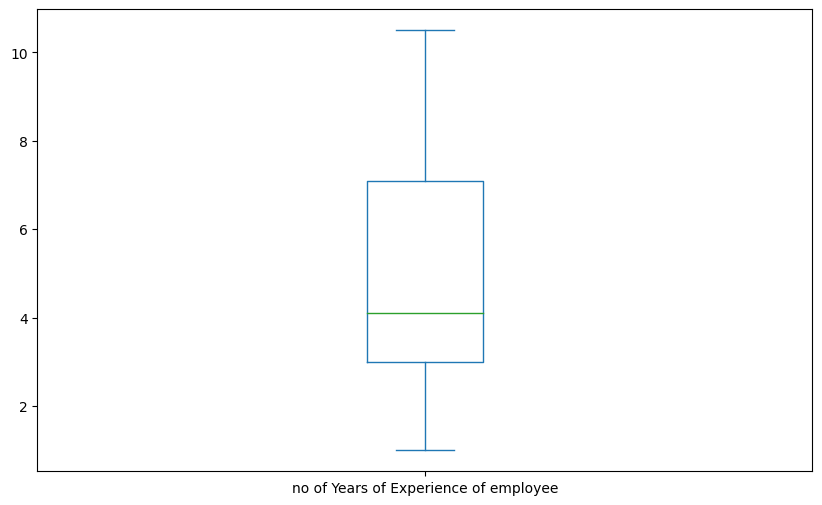

In [20]:
#Box plot visualization to view the outliers.

X[numeric_data].plot(kind = 'box', subplots = True, sharey = False, figsize = (10, 6))

plt.subplots_adjust(wspace = 0.75)
plt.show()

# No outliers

#### Scaling with Normalization - MinMaxScaler

In [21]:
scale_pipeline = Pipeline([('scale', MinMaxScaler())])

In [22]:
processed_pipeline = ColumnTransformer([('scale', scale_pipeline, numeric_data)])

In [23]:
processed = processed_pipeline.fit(X)
processed

ColumnTransformer(transformers=[('scale',
                                 Pipeline(steps=[('scale', MinMaxScaler())]),
                                 Index(['no of Years of Experience of employee'], dtype='object'))])

In [24]:
data_norm = pd.DataFrame(processed.transform(X))
data_norm

,0
0,0.010526
1,0.031579
2,0.052632
3,0.105263
4,0.126316
...,...
191,0.305263
192,0.315789
193,0.315789
194,0.326316


In [25]:
HR_data['Position of the employee'].unique()

array(['Business Analyst', 'Junior Consultant', 'Senior Consultant',
       'Manager', 'Country Manager', 'Region Manager', 'Partner',
       'Senior Partner', 'C-level', 'CEO'], dtype=object)

#### Convert Categorical data to Numerical data using OneHotEncoder

In [26]:
categ_pipeline = Pipeline([('onehot', OneHotEncoder())])

In [27]:
preprocess_pipeline2 = ColumnTransformer([('categorical', categ_pipeline, cate_data)])

In [28]:
processed2 = preprocess_pipeline2.fit(X)

In [29]:
encode_data = pd.DataFrame(processed2.transform(X).todense())
encode_data

,0,1,2,3,4,5,6,7,8,9
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
191,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
192,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
193,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
194,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [30]:
# concatenate the data
clean_data = pd.concat([encode_data, data_norm], axis = 1, ignore_index = True)
clean_data

,0,1,2,3,4,5,6,7,8,9,10
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.010526
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.031579
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.052632
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.105263
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.126316
...,...,...,...,...,...,...,...,...,...,...,...
191,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.305263
192,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.315789
193,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.315789
194,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.326316


In [31]:
clean_data.describe()

,0,1,2,3,4,5,6,7,8,9,10
count,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000
mean,0.040816,0.122449,0.117347,0.091837,0.071429,0.086735,0.142857,0.117347,0.081633,0.127551,0.432868
std,0.198371,0.328643,0.322657,0.289535,0.258199,0.282167,0.350823,0.322657,0.274505,0.334443,0.293052
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.210526
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.326316
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.642105
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [32]:
# Split data into train and test with Stratified sample technique
X_train, X_test, Y_train, Y_test = train_test_split(clean_data, Y, test_size = 0.2, stratify = Y, random_state = 0)

In [33]:
# Proportion of Target variable categories are consistent across train and test

print(Y_train.value_counts()/ 157)
print("\n")
print(Y_test.value_counts()/ 39)

Low_Income     0.598726
High_Income    0.394904
Name: Y, dtype: float64


Low_Income     0.615385
High_Income    0.410256
Name: Y, dtype: float64


In [34]:
Y_train.value_counts()

Low_Income     94
High_Income    62
Name: Y, dtype: int64

In [35]:
HR_data.columns

Index(['Position of the employee', 'no of Years of Experience of employee',
       ' monthly income of employee', 'Y'],
      dtype='object')

## Decision Tree Model

In [36]:
model = DT(criterion = 'entropy')
model.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy')

In [37]:
# Prediction on Test Data
preds = model.predict(X_test)
preds

array(['Low_Income', 'High_Income', 'High_Income', 'Low_Income',
       'High_Income', 'Low_Income', 'Low_Income', 'High_Income',
       'Low_Income', 'Low_Income', 'Low_Income', 'High_Income',
       'Low_Income', 'High_Income', 'Low_Income', 'High_Income',
       'Low_Income', 'Low_Income', 'Low_Income', 'High_Income',
       'Low_Income', 'High_Income', 'Low_Income', 'Low_Income',
       'Low_Income', 'High_Income', 'High_Income', 'Low_Income',
       'Low_Income', 'Low_Income', 'High_Income', 'High_Income',
       'High_Income', 'Low_Income', 'Low_Income', 'Low_Income',
       'High_Income', 'High_Income', 'Low_Income', 'Low_Income'],
      dtype=object)

In [38]:
# Accuracy

print(accuracy_score(Y_test, preds))

1.0


In [39]:
pd.crosstab(Y_test, preds, rownames = ['Actual'], colnames= ['Predictions'])

Predictions,High_Income,Low_Income
Actual,,
Low_Income,0,24
High_Income,16,0


[Text(0.5, 1.0, 'Sales Classification Confusion Matrix(Train)'),
 Text(0.5, 0, 'Predicted Value'),
 Text(0, 0.5, 'Actual Value')]

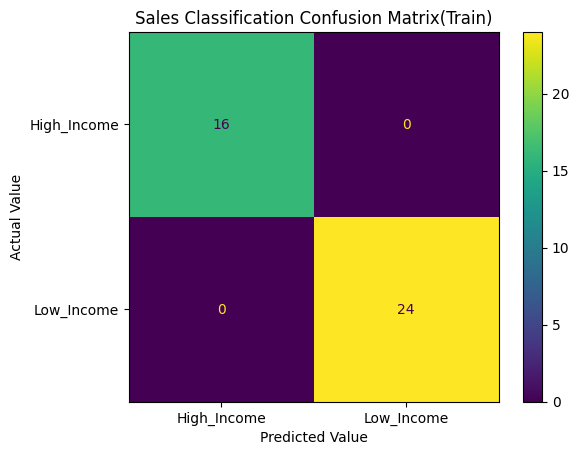

In [40]:
# Confusion Matrix - Heat Map
cm = skmet.confusion_matrix(Y_test, preds)
cmplot = skmet.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['High_Income', 'Low_Income'])
cmplot.plot()
cmplot.ax_.set(title = 'Sales Classification Confusion Matrix(Train)', 
               xlabel = 'Predicted Value', ylabel = 'Actual Value')

## Hyperparameter Optimization

In [41]:
# create a dictionary of all hyperparameters to be experimented
param_grid = {'criterion':['gini', 'entropy'], 'max_depth': np.arange(3, 15)}

# Decision tree model
dtree_model = DT()

# GridsearchCV with cross-validation to perform experiments with parameters set
dtree_gscv = GridSearchCV(dtree_model, param_grid, cv = 5, scoring = 'accuracy', return_train_score = False, verbose = 1 )

In [42]:
# Train
dtree_gscv.fit(clean_data, Y)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])},
             scoring='accuracy', verbose=1)

In [43]:
# The best set of parameter values
dtree_gscv.best_params_

{'criterion': 'gini', 'max_depth': 3}

In [44]:
# Model with best parameter values
DT_best = dtree_gscv.best_estimator_

In [45]:
DT_best

DecisionTreeClassifier(max_depth=3)

In [46]:
# Prediction on Test Data
preds1 = DT_best.predict(X_test)
preds1

array(['Low_Income', 'High_Income', 'High_Income', 'Low_Income',
       'High_Income', 'Low_Income', 'Low_Income', 'High_Income',
       'Low_Income', 'Low_Income', 'Low_Income', 'High_Income',
       'Low_Income', 'High_Income', 'Low_Income', 'High_Income',
       'Low_Income', 'Low_Income', 'Low_Income', 'High_Income',
       'Low_Income', 'High_Income', 'Low_Income', 'Low_Income',
       'Low_Income', 'High_Income', 'High_Income', 'Low_Income',
       'Low_Income', 'Low_Income', 'High_Income', 'High_Income',
       'High_Income', 'Low_Income', 'Low_Income', 'Low_Income',
       'High_Income', 'High_Income', 'Low_Income', 'Low_Income'],
      dtype=object)

In [47]:
pd.crosstab(Y_test, preds1, rownames = ['Actual'], colnames= ['Predictions']) 

Predictions,High_Income,Low_Income
Actual,,
Low_Income,0,24
High_Income,16,0


In [48]:
# Accuracy
print(accuracy_score(Y_test, preds1))

1.0


[Text(0.5, 1.0, 'Sales Classification Confusion Matrix(Train)'),
 Text(0.5, 0, 'Predicted Value'),
 Text(0, 0.5, 'Actual Value')]

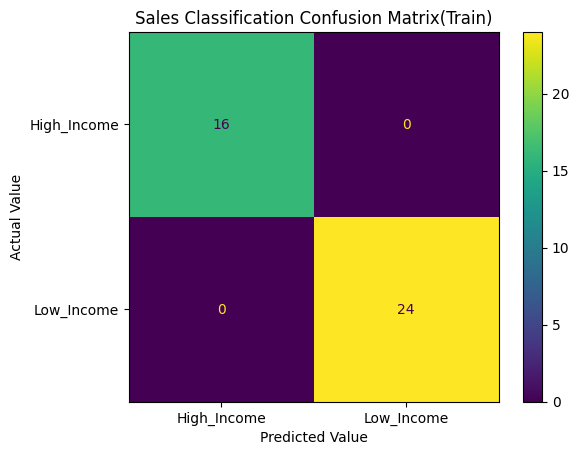

In [49]:
# Confusion Matrix - Heat Map
cm = skmet.confusion_matrix(Y_test, preds1)
cmplot = skmet.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['High_Income', 'Low_Income'])
cmplot.plot()
cmplot.ax_.set(title = 'Sales Classification Confusion Matrix(Train)', 
               xlabel = 'Predicted Value', ylabel = 'Actual Value')

In [50]:
import os
import graphviz
from sklearn import tree
from sklearn.tree import export_graphviz

In [51]:
predictors = list(clean_data.columns)
type(predictors)

list

In [52]:
dot_data = tree.export_graphviz(DT_best, filled = True, 
                                rounded = True,
                                feature_names = predictors,
                                #class_names = ['Default', "Not Default"],
                                out_file = None)

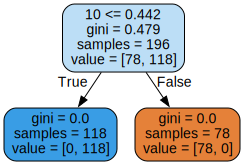

In [53]:
graph = graphviz.Source(dot_data)
graph

In [54]:
# Prediction on Train Data

preds_train = DT_best.predict(X_train)
preds_train

array(['High_Income', 'High_Income', 'High_Income', 'Low_Income',
       'Low_Income', 'Low_Income', 'Low_Income', 'Low_Income',
       'High_Income', 'Low_Income', 'Low_Income', 'Low_Income',
       'Low_Income', 'Low_Income', 'Low_Income', 'Low_Income',
       'High_Income', 'Low_Income', 'High_Income', 'Low_Income',
       'High_Income', 'Low_Income', 'Low_Income', 'Low_Income',
       'High_Income', 'Low_Income', 'Low_Income', 'Low_Income',
       'High_Income', 'Low_Income', 'High_Income', 'High_Income',
       'High_Income', 'High_Income', 'Low_Income', 'Low_Income',
       'Low_Income', 'Low_Income', 'High_Income', 'Low_Income',
       'High_Income', 'High_Income', 'High_Income', 'High_Income',
       'High_Income', 'Low_Income', 'High_Income', 'Low_Income',
       'Low_Income', 'Low_Income', 'Low_Income', 'Low_Income',
       'High_Income', 'Low_Income', 'Low_Income', 'Low_Income',
       'High_Income', 'High_Income', 'Low_Income', 'Low_Income',
       'High_Income', 'Low_Incom

In [55]:
# Confusion Matrix
pd.crosstab(Y_train, preds_train, rownames = ['Actual'], colnames = ['Predictions']) 

Predictions,High_Income,Low_Income
Actual,,
Low_Income,0,94
High_Income,62,0


In [56]:
# Accuracy
print(accuracy_score(Y_train, preds_train))

1.0


[Text(0.5, 1.0, 'Sales Classification Confusion Matrix(Train)'),
 Text(0.5, 0, 'Predicted Value'),
 Text(0, 0.5, 'Actual Value')]

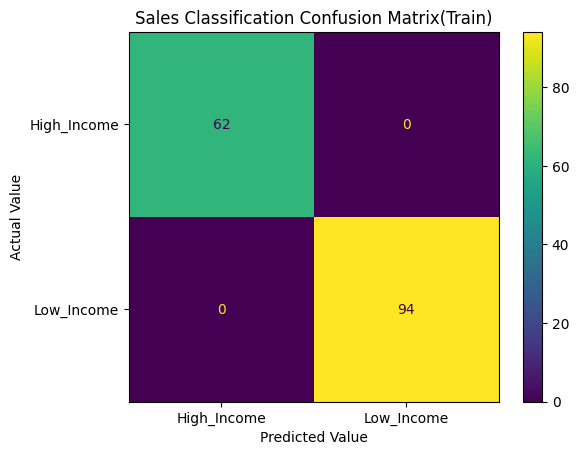

In [57]:
# Confusion Matrix - Heat Map
cm = skmet.confusion_matrix(Y_train, preds_train)
cmplot = skmet.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['High_Income', 'Low_Income'])
cmplot.plot()
cmplot.ax_.set(title = 'Sales Classification Confusion Matrix(Train)', 
               xlabel = 'Predicted Value', ylabel = 'Actual Value')

## Model Training with Cross Validation

In [58]:

from sklearn.model_selection import cross_validate


def cross_validation(model, _X, _y, _cv=5):
    
    '''Function to perform 5 Folds Cross-Validation
    Parameters
    ----------
    model: Python Class, default=None
          This is the machine learning algorithm to be used for training.
    _X: array
       This is the matrix of features.
    _y: array
       This is the target variable.
    _cv: int, default=5
      Determines the number of folds for cross-validation.
    Returns
    -------
    The function returns a dictionary containing the metrics 'accuracy', 'precision',
    'recall', 'f1' for both training set and validation set.
    '''
    _scoring = ['accuracy', 'precision', 'recall', 'f1']
    results = cross_validate(estimator=model,
                           X=_X,
                           y=_y,
                           cv=_cv,
                           scoring=_scoring,
                           return_train_score=True)

    return pd.DataFrame({"Training Accuracy scores": results['train_accuracy'],
          "Mean Training Accuracy": results['train_accuracy'].mean()*100,
          "Training Precision scores": results['train_precision'],
          "Mean Training Precision": results['train_precision'].mean(),
          "Training Recall scores": results['train_recall'],
          "Mean Training Recall": results['train_recall'].mean(),
          "Training F1 scores": results['train_f1'],
          "Mean Training F1 Score": results['train_f1'].mean(),
          "Validation Accuracy scores": results['test_accuracy'],
          "Mean Validation Accuracy": results['test_accuracy'].mean()*100,
          "Validation Precision scores": results['test_precision'],
          "Mean Validation Precision": results['test_precision'].mean(),
          "Validation Recall scores": results['test_recall'],
          "Mean Validation Recall": results['test_recall'].mean(),
          "Validation F1 scores": results['test_f1'],
          "Mean Validation F1 Score": results['test_f1'].mean()
          })
from sklearn.model_selection import cross_validate

In [59]:
from sklearn.preprocessing import LabelEncoder  # labelencoder is applied for target variable
label_encoder = LabelEncoder()
encoded_y = label_encoder.fit_transform(Y_train)

label_encoder_name_mapping = dict(zip(label_encoder.classes_,
                                         label_encoder.transform(label_encoder.classes_)))

print("Mapping of Label Encoded Classes", label_encoder_name_mapping, sep="\n")
print("Label Encoded Target Variable", encoded_y, sep="\n")

Mapping of Label Encoded Classes
{'High_Income': 0, 'Low_Income': 1}
Label Encoded Target Variable
[0 0 0 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 0 1 0 1 1 1 0 1 1 1 0 1 0 0 0 0 1 1 1
 1 0 1 0 0 0 0 0 1 0 1 1 1 1 1 0 1 1 1 0 0 1 1 0 1 1 1 0 0 1 1 0 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 0 1 0 1 1 1 1 1 1 0 0 1
 0 0 1 1 0 1 1 1 0 1 1 0 1 0 0 0 1 1 0 0 1 0 1 1 0 0 0 0 0 1 1 1 1 0 0 0 0
 0 1 0 1 0 1 1 1]


In [60]:
from sklearn.tree import DecisionTreeClassifier

decision_tree_result = cross_validation(DT_best, X_train, encoded_y, 5)
decision_tree_result

,Training Accuracy scores,Mean Training Accuracy,Training Precision scores,Mean Training Precision,Training Recall scores,Mean Training Recall,Training F1 scores,Mean Training F1 Score,Validation Accuracy scores,Mean Validation Accuracy,Validation Precision scores,Mean Validation Precision,Validation Recall scores,Mean Validation Recall,Validation F1 scores,Mean Validation F1 Score
0,1.0,100.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,100.0,1.0,1.0,1.0,1.0,1.0,1.0
1,1.0,100.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,100.0,1.0,1.0,1.0,1.0,1.0,1.0
2,1.0,100.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,100.0,1.0,1.0,1.0,1.0,1.0,1.0
3,1.0,100.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,100.0,1.0,1.0,1.0,1.0,1.0,1.0
4,1.0,100.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,100.0,1.0,1.0,1.0,1.0,1.0,1.0


In [61]:
def plot_result(x_label, y_label, plot_title, train_data, val_data):
        '''Function to plot a grouped bar chart showing the training and validation
          results of the ML model in each fold after applying K-fold cross-validation.
         Parameters
         ----------
         x_label: str, 
            Name of the algorithm used for training e.g 'Decision Tree'
          
         y_label: str, 
            Name of metric being visualized e.g 'Accuracy'
         plot_title: str, 
            This is the title of the plot e.g 'Accuracy Plot'
         
         train_result: list, array
            This is the list containing either training precision, accuracy, or f1 score.
        
         val_result: list, array
            This is the list containing either validation precision, accuracy, or f1 score.
         Returns
         -------
         The function returns a Grouped Barchart showing the training and validation result
         in each fold.
        '''
        
        # Set size of plot
        plt.figure(figsize=(12,6))
        labels = ["1st Fold", "2nd Fold", "3rd Fold", "4th Fold", "5th Fold"]
        X_axis = np.arange(len(labels))
        ax = plt.gca()
        plt.ylim(0.40000, 1)
        plt.bar(X_axis-0.2, train_data, 0.4, color='blue', label='Training')
        plt.bar(X_axis+0.2, val_data, 0.4, color='red', label='Validation')
        plt.title(plot_title, fontsize=30)
        plt.xticks(X_axis, labels)
        plt.xlabel(x_label, fontsize=14)
        plt.ylabel(y_label, fontsize=14)
        plt.legend()
        plt.grid(True)
        plt.show()

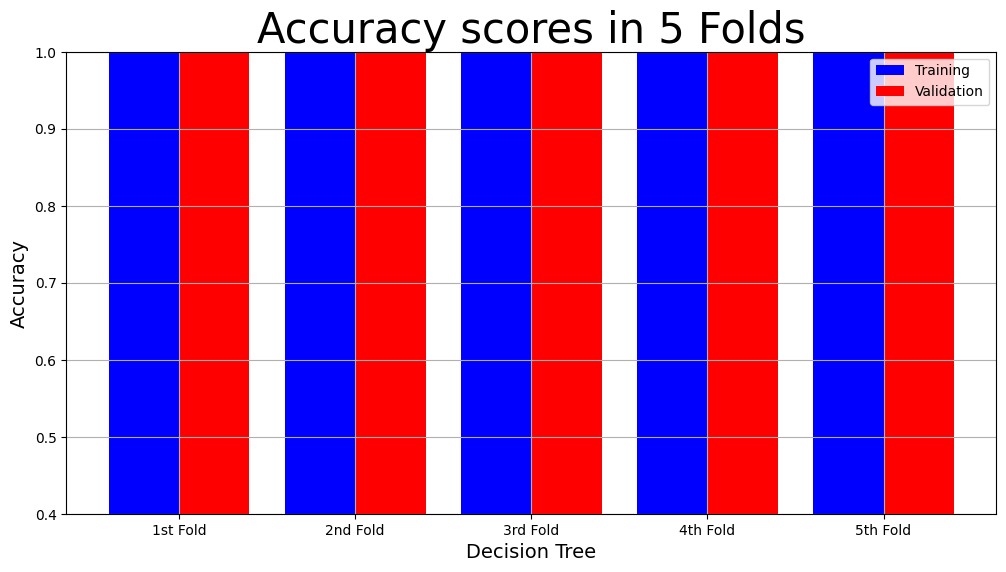

In [62]:
model_name = "Decision Tree"
plot_result(model_name,
            "Accuracy",
            "Accuracy scores in 5 Folds",
            decision_tree_result["Training Accuracy scores"],
            decision_tree_result["Validation Accuracy scores"])

## Random Forest Classifier

In [63]:
# creating random forest classifier
clf = RandomForestClassifier(n_estimators = 100)

In [64]:
# Training the model on the training dataset
clf.fit(X_train, Y_train)

RandomForestClassifier()

In [65]:
# predictions on the test dataset
y_pred = clf.predict(X_test)
y_pred

array(['Low_Income', 'High_Income', 'High_Income', 'Low_Income',
       'High_Income', 'Low_Income', 'Low_Income', 'High_Income',
       'Low_Income', 'Low_Income', 'Low_Income', 'High_Income',
       'Low_Income', 'High_Income', 'Low_Income', 'High_Income',
       'Low_Income', 'Low_Income', 'Low_Income', 'High_Income',
       'Low_Income', 'High_Income', 'Low_Income', 'Low_Income',
       'Low_Income', 'High_Income', 'High_Income', 'Low_Income',
       'Low_Income', 'Low_Income', 'High_Income', 'High_Income',
       'High_Income', 'Low_Income', 'Low_Income', 'Low_Income',
       'High_Income', 'High_Income', 'Low_Income', 'Low_Income'],
      dtype=object)

In [66]:
print(accuracy_score(Y_test, y_pred))

1.0


[Text(0.5, 1.0, 'Sales Classification Confusion Matrix(Train)'),
 Text(0.5, 0, 'Predicted Value'),
 Text(0, 0.5, 'Actual Value')]

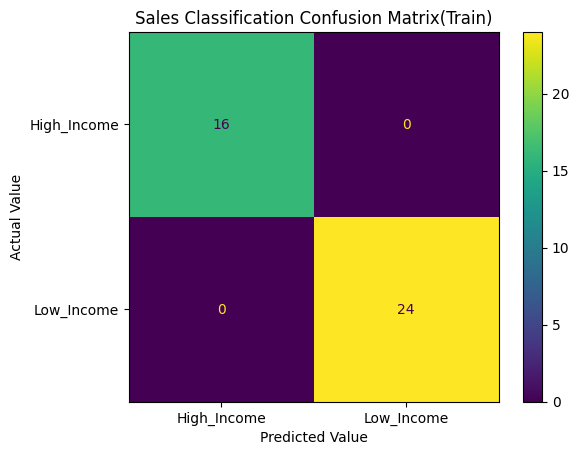

In [67]:
# Confusion Matrix - Heat Map
cm = skmet.confusion_matrix(Y_test, y_pred)
cmplot = skmet.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['High_Income', 'Low_Income'])
cmplot.plot()
cmplot.ax_.set(title = 'Sales Classification Confusion Matrix(Train)', 
               xlabel = 'Predicted Value', ylabel = 'Actual Value')